<a href="https://colab.research.google.com/github/rodriguezpjavier/P_CD_Guia_3/blob/main/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo:
* para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH.
* En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio.
* La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.
* Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".
* Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [1]:
from google.colab import drive
import os , shutil
#--------------------------------------------------------------------------------------------------------------------------------------------

os.chdir('/content/')  # Establecer la ruta de trabajo por defecto.
drive.mount('/content/drive') # Montaje de la Carpeta Drive para poder acceder a los Archivos del Drive Directamente, para la primera ejecución hay que dar permisos sobre el Drive.
strFile ='accidents-1.csv' # Nombre del Archivo a trabajar en el proyecto
strPathTrabajo = os.getcwd()+"/P_CD/Guia_3/" # Path de Trabajo para el Resto del Proyecto
strPathOrigen = os.getcwd()+"/drive/MyDrive/Colab Notebooks/2025_25EAN_ProgramacionParaCienciaDeDatos/Semana3/Taller/"+strFile  # Path Origen del Archivo de Trabajo que es Drive
strPathDestino = strPathTrabajo + strFile # Estructuracion de la ruta para Deposito del archvo de trabajo.
#--------------------------------------------------------------------------------------------------------------------------------------------
# Validacion de Existencia de la Carpeta Destino del proyecto
if os.path.exists(strPathTrabajo) == True:
  shutil.rmtree(strPathTrabajo) # Eliminacion de la Carperta  si existe y  todo Su Contenido
os.makedirs(strPathTrabajo, exist_ok=True) # Creación carpeta de trabajo
os.chdir(strPathTrabajo) # establecer la carpeta de Trabajo para el proyecto
#--------------------------------------------------------------------------------------------------------------------------------------------
shutil.copy(strPathOrigen, strPathDestino)  # Copia el archivo
print("La nueva ruta de Trabajo para el Proyetco es: ", strPathTrabajo , "con los Siguientes Archvos contenidos : " , os.listdir(strPathTrabajo))
#--------------------------------------------------------------------------------------------------------------------------------------------

Mounted at /content/drive
La nueva ruta de Trabajo para el Proyetco es:  /content/P_CD/Guia_3/ con los Siguientes Archvos contenidos :  ['accidents-1.csv']


In [2]:
import pandas as pd

df = pd.read_csv(strFile , sep=";") # Carga de Set de Datos.
df.columns = df.columns.str.replace(" ", "_")

Registros , Variables = df.shape
print(f"El Set de Datos tiene {Registros} Registros y {Variables} Variables")

El Set de Datos tiene 238522 Registros y 24 Variables


In [3]:
print(f"Los Tipos de Datos de las {Variables} columnas/variables que contiene el df son las Siguientes:")
print(df.dtypes)

Los Tipos de Datos de las 24 columnas/variables que contiene el df son las Siguientes:
DATE                              object
TIME                              object
BOROUGH                           object
ZIP_CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON_STREET_NAME                    object
NUMBER_OF_PEDESTRIANS_INJURED      int64
NUMBER_OF_PEDESTRIANS_KILLED       int64
NUMBER_OF_CYCLIST_INJURED          int64
NUMBER_OF_CYCLIST_KILLED           int64
NUMBER_OF_MOTORIST_INJURED         int64
NUMBER_OF_MOTORIST_KILLED          int64
CONTRIBUTING_FACTOR_VEHICLE_1     object
CONTRIBUTING_FACTOR_VEHICLE_2     object
CONTRIBUTING_FACTOR_VEHICLE_3     object
CONTRIBUTING_FACTOR_VEHICLE_4     object
CONTRIBUTING_FACTOR_VEHICLE_5     object
COLLISION_ID                       int64
VEHICLE_TYPE_CODE_1               object
VEHICLE_TYPE_CODE_2               object
VEHICLE_TYPE_CODE_3               object
VEHICLE_TYP

In [4]:
print("Cantidad de Variables por Tipo de dato")
print(df.dtypes.value_counts())

Cantidad de Variables por Tipo de dato
object     14
int64       7
float64     3
Name: count, dtype: int64


In [5]:
print("Verificación de valores ausentes en el Set de Datos")
df.info()

Verificación de valores ausentes en el Set de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP_CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON_STREET_NAME                 153918 non-null  object 
 7   NUMBER_OF_PEDESTRIANS_INJURED  238522 non-null  int64  
 8   NUMBER_OF_PEDESTRIANS_KILLED   238522 non-null  int64  
 9   NUMBER_OF_CYCLIST_INJURED      238522 non-null  int64  
 10  NUMBER_OF_CYCLIST_KILLED       238522 non-null  int64  
 11  NUMBER_OF_MOTORIST_INJURED     238522 n

In [6]:
df["COLLISION_ID"].count()

238522

In [7]:
len(df["COLLISION_ID"].unique())

238522

In [8]:
df.groupby("BOROUGH").count()["COLLISION_ID"]

,COLLISION_ID
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


In [9]:
df["CONTRIBUTING_FACTOR_VEHICLE_1"].value_counts()

,count
CONTRIBUTING_FACTOR_VEHICLE_1,
Unspecified,59307
Driver Inattention/Distraction,58551
Failure to Yield Right-of-Way,18236
Following Too Closely,15370
Backing Unsafely,13876
Passing Too Closely,11337
Passing or Lane Usage Improper,10469
Other Vehicular,7509
Turning Improperly,6043


In [10]:
# Para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH.
df_Mod1 = df.copy()
for Municipio in df["BOROUGH"].unique():
    dfFil = df_Mod1["BOROUGH"] == Municipio
    df_Mod1.loc[dfFil, 'ZIP_CODE'] = df_Mod1.loc[dfFil, 'ZIP_CODE'].fillna(df_Mod1.loc[dfFil, 'ZIP_CODE'].mode().iloc[0])

In [11]:
df[["BOROUGH","ZIP_CODE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BOROUGH   238522 non-null  object 
 1   ZIP_CODE  238452 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [12]:
df_Mod1[["BOROUGH","ZIP_CODE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BOROUGH   238522 non-null  object 
 1   ZIP_CODE  238522 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [13]:
# En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio.
df_Mod2 = df_Mod1.copy()
for Municipio in df["BOROUGH"].unique():
    dfFil = df_Mod2["BOROUGH"] == Municipio
    df_Mod2.loc[dfFil, 'LATITUDE'] = df_Mod2.loc[dfFil, 'LATITUDE'].fillna(df_Mod2.loc[dfFil, 'LATITUDE'].median())
    df_Mod2.loc[dfFil, 'LONGITUDE'] = df_Mod2.loc[dfFil, 'LONGITUDE'].fillna(df_Mod2.loc[dfFil, 'LONGITUDE'].median())

In [14]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BOROUGH    238522 non-null  object 
 1   ZIP_CODE   238452 non-null  float64
 2   LATITUDE   231544 non-null  float64
 3   LONGITUDE  231544 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [15]:
df_Mod2[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BOROUGH    238522 non-null  object 
 1   ZIP_CODE   238522 non-null  float64
 2   LATITUDE   238522 non-null  float64
 3   LONGITUDE  238522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [16]:
# La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.
df_Mod3 = df_Mod2.copy()
df_Mod3.loc[:, 'ON_STREET_NAME'] = df_Mod3['ON_STREET_NAME'].fillna("UNKNOWN")

In [17]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BOROUGH         238522 non-null  object 
 1   ZIP_CODE        238452 non-null  float64
 2   LATITUDE        231544 non-null  float64
 3   LONGITUDE       231544 non-null  float64
 4   ON_STREET_NAME  153918 non-null  object 
dtypes: float64(3), object(2)
memory usage: 9.1+ MB


In [18]:
df_Mod3[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BOROUGH         238522 non-null  object 
 1   ZIP_CODE        238522 non-null  float64
 2   LATITUDE        238522 non-null  float64
 3   LONGITUDE       238522 non-null  float64
 4   ON_STREET_NAME  238522 non-null  object 
dtypes: float64(3), object(2)
memory usage: 9.1+ MB


In [19]:
# Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".
df_Mod4 = df_Mod3.copy()
for i in range(1, 6):
    df_Mod4.loc[:, 'CONTRIBUTING_FACTOR_VEHICLE_'+str(i)] = df_Mod4['CONTRIBUTING_FACTOR_VEHICLE_'+str(i)].fillna("Unspecified")

In [20]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME","CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238452 non-null  float64
 2   LATITUDE                       231544 non-null  float64
 3   LONGITUDE                      231544 non-null  float64
 4   ON_STREET_NAME                 153918 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  237638 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  198514 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  13072 non-null   object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  2856 non-null    object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  792 non-null     object 
dtypes: float64(3), object(7)
memory usage: 18.2+ MB


In [21]:
df_Mod4[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME","CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238522 non-null  float64
 2   LATITUDE                       238522 non-null  float64
 3   LONGITUDE                      238522 non-null  float64
 4   ON_STREET_NAME                 238522 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  238522 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  238522 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  238522 non-null  object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  238522 non-null  object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  238522 non-null  object 
dtypes: float64(3), object(7)
memory usage: 18.2+ MB


In [22]:
# Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.
df_Final = df_Mod4.copy()
for i in range(1, 6):
    df_Final.loc[:, 'VEHICLE_TYPE_CODE_'+str(i)] = df_Final['VEHICLE_TYPE_CODE_'+str(i)].fillna("UnspeciUnknownfied")

In [23]:
df_Final[["BOROUGH","ZIP_CODE",
          "LATITUDE","LONGITUDE",
          "ON_STREET_NAME",
          "CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5",
          "VEHICLE_TYPE_CODE_1","VEHICLE_TYPE_CODE_2","VEHICLE_TYPE_CODE_3","VEHICLE_TYPE_CODE_4","VEHICLE_TYPE_CODE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238522 non-null  float64
 2   LATITUDE                       238522 non-null  float64
 3   LONGITUDE                      238522 non-null  float64
 4   ON_STREET_NAME                 238522 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  238522 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  238522 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  238522 non-null  object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  238522 non-null  object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  238522 non-null  object 
 10  VEHICLE_TYPE_CODE_1            238522 non-null  object 
 11  VEHICLE_TYPE_CODE_2            238522 non-null  object 
 12  VEHICLE_TYPE_CODE_3           

In [24]:
#------------------------------------------------------------------------------------------------------------------------
# Complementar el Dataframe
#------------------------------------------------------------------------------------------------------------------------
# dic_area = {"BRONX": 42.2,"BROOKLYN": 69.4,"MANHATTAN": 22.7,"QUEENS": 108.7,"STATEN ISLAND": 57.5}
# df_area = pd.DataFrame(list(dic_area.items()), columns=['BOROUGH', 'BOROUGH_AREA'])
# df_Final = pd.merge(df_Final, df_area, on='BOROUGH', how='left')

lstOrdenCols = ['COLLISION_ID','DATE','TIME','BOROUGH','LATITUDE','ZIP_CODE','LONGITUDE','ON_STREET_NAME',
             'NUMBER_OF_PEDESTRIANS_INJURED','NUMBER_OF_PEDESTRIANS_KILLED',
             'NUMBER_OF_CYCLIST_INJURED','NUMBER_OF_CYCLIST_KILLED',
             'NUMBER_OF_MOTORIST_INJURED','NUMBER_OF_MOTORIST_KILLED',
             'CONTRIBUTING_FACTOR_VEHICLE_1','CONTRIBUTING_FACTOR_VEHICLE_2','CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5',
             'VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5']
df_Final=df_Final[lstOrdenCols]
#------------------------------------------------------------------------------------------------------------------------
df_Final.to_csv('Mod'+strFile,index_label=False , index=False)
#------------------------------------------------------------------------------------------------------------------------

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Mod'+strFile ) # Carga de Set de Datos Modificado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   COLLISION_ID                   238522 non-null  int64  
 1   DATE                           238522 non-null  object 
 2   TIME                           238522 non-null  object 
 3   BOROUGH                        238522 non-null  object 
 4   LATITUDE                       238522 non-null  float64
 5   ZIP_CODE                       238522 non-null  float64
 6   LONGITUDE                      238522 non-null  float64
 7   ON_STREET_NAME                 238522 non-null  object 
 8   NUMBER_OF_PEDESTRIANS_INJURED  238522 non-null  int64  
 9   NUMBER_OF_PEDESTRIANS_KILLED   238522 non-null  int64  
 10  NUMBER_OF_CYCLIST_INJURED      238522 non-null  int64  
 11  NUMBER_OF_CYCLIST_KILLED       238522 non-null  int64  
 12  NUMBER_OF_MOTORIST_INJURED    

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:
|
- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


In [26]:
df_Mod1 = df.copy()
df_Mod1["DATE"] = pd.to_datetime(df["DATE"])
df_Mod1["DATE_YYYY_mm"] = df_Mod1["DATE"].dt.to_period('M')
# df_Mod1[["DATE","DATE_YYYY_mm"]]  Verificacion de la Transformacion de la Variable
df_InfpPlot = df_Mod1.groupby("DATE_YYYY_mm").count()["COLLISION_ID"]
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

,COLLISION_ID
DATE_YYYY_mm,
2018-01,11735
2018-02,10395
2018-03,12519
2018-04,11679
2018-05,13438
2018-06,13314
2018-07,12787
2018-08,12644
2018-09,12425


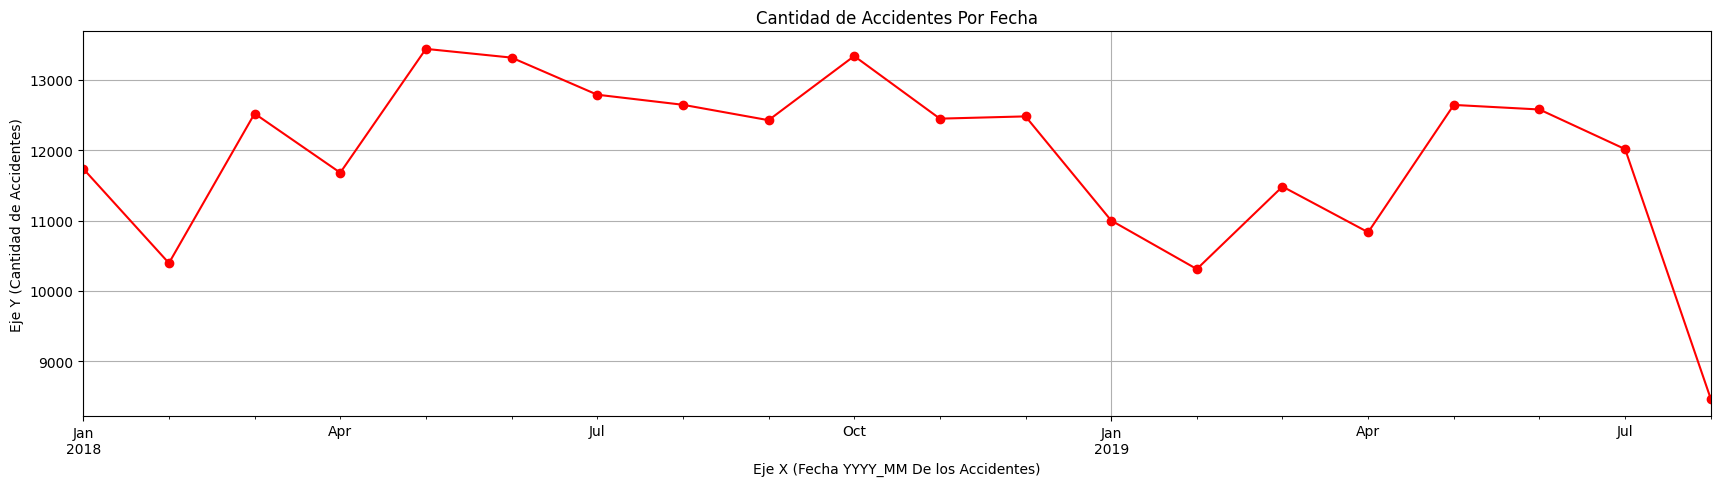

In [27]:
plt.figure(figsize=(21, 5))
df_InfpPlot.plot(kind="line", marker='o', linestyle='-', color='r')
plt.xlabel("Eje X (Fecha YYYY_MM De los Accidentes)")
plt.ylabel("Eje Y (Cantidad de Accidentes)")
plt.title("Cantidad de Accidentes Por Fecha")
plt.grid()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior,
 1. ¿qué meses parecen tener el menor número de accidentes?
- Febrero 2018 - Febrero 2019
 2. ¿Cuáles crees que son las razones detrás de esto?
-  Temporalidad dada la Estacion del Año

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

In [28]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["HOUR"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.hour
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby("HOUR").count()["COLLISION_ID"]
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

,COLLISION_ID
HOUR,
0,8160
1,3460
2,2570
3,2302
4,2562
5,2878
6,4844
7,7399
8,13403


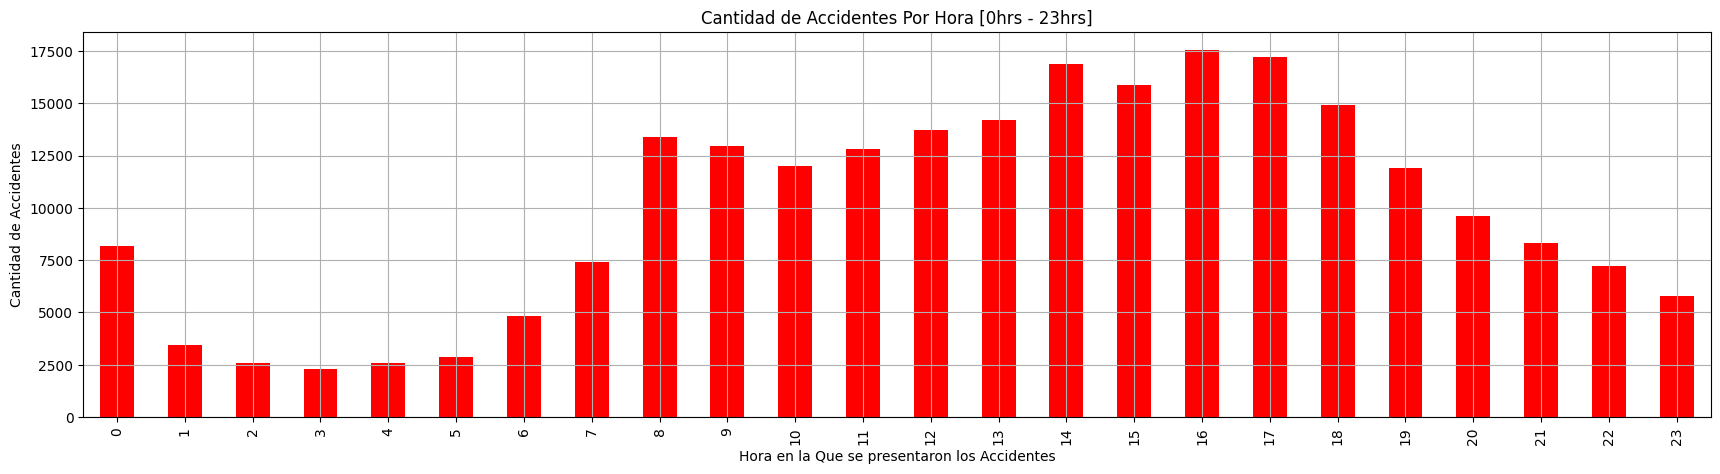

In [29]:
plt.figure(figsize=(21, 5))
df_InfpPlot.plot(kind="bar", color='r')
plt.xlabel("Hora en la Que se presentaron los Accidentes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Cantidad de Accidentes Por Hora [0hrs - 23hrs]")
plt.grid()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

Permite analizar cual es el Horario mas Frecuente en el que se presentaron los Accidentes desde Enero del 2018 a Agosto del 2019.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

In [30]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["WEEKDAY"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.weekday
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby("WEEKDAY").count()["COLLISION_ID"]
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

,COLLISION_ID
WEEKDAY,
0,34719
1,35651
2,35188
3,36254
4,37886
5,31784
6,27040


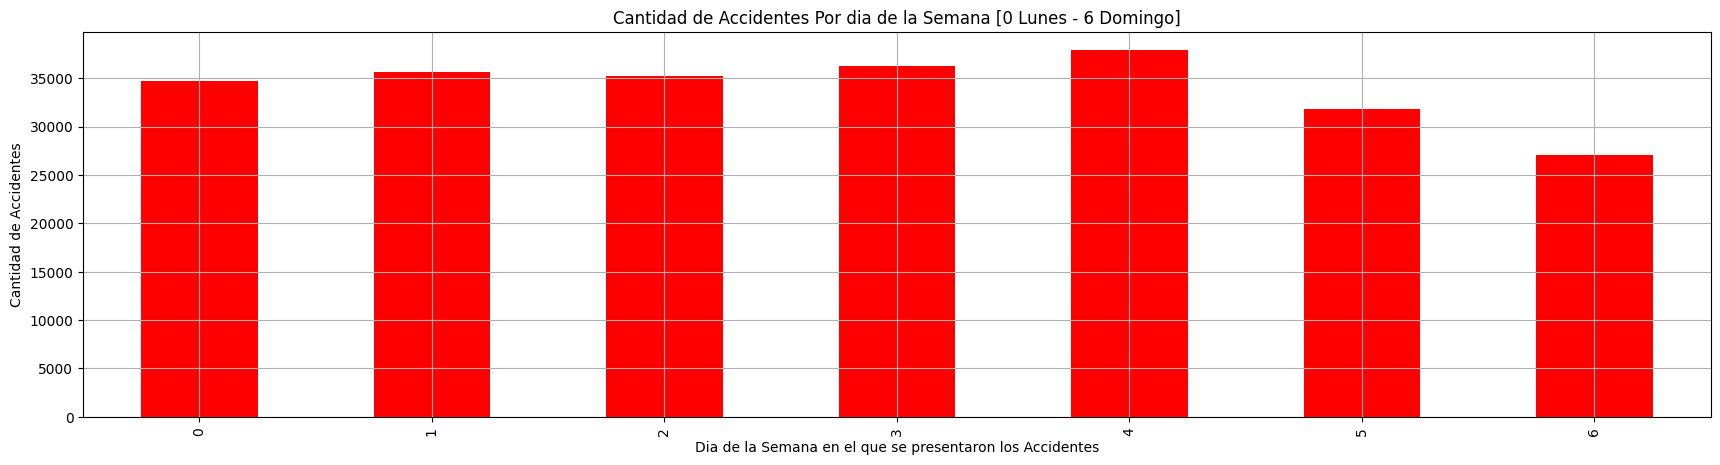

In [31]:
plt.figure(figsize=(21, 5))
df_InfpPlot.plot(kind="bar", color='r')
plt.xlabel("Dia de la Semana en el que se presentaron los Accidentes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Cantidad de Accidentes Por dia de la Semana [0 Lunes - 6 Domingo]")
plt.grid()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

In [33]:
# Solución propuesta
df_Mod = df.copy()
df_InfpPlot = df_Mod.groupby("BOROUGH").count()["COLLISION_ID"].reset_index()
dic_area = {"BRONX": 42.2,"BROOKLYN": 69.4,"MANHATTAN": 22.7,"QUEENS": 108.7,"STATEN ISLAND": 57.5}
df_area = pd.DataFrame(list(dic_area.items()), columns=['BOROUGH', 'BOROUGH_AREA'])
df_Plot = pd.merge(df_InfpPlot, df_area, on='BOROUGH', how='left')
df_Plot["COLLITIONS_RATE"] = round(df_Plot["COLLISION_ID"] / df_Plot["BOROUGH_AREA"],0)
df_Plot

,BOROUGH,COLLISION_ID,BOROUGH_AREA,COLLITIONS_RATE
0,BRONX,37709,42.2,894.0
1,BROOKLYN,76253,69.4,1099.0
2,MANHATTAN,48749,22.7,2148.0
3,QUEENS,67120,108.7,617.0
4,STATEN ISLAND,8691,57.5,151.0


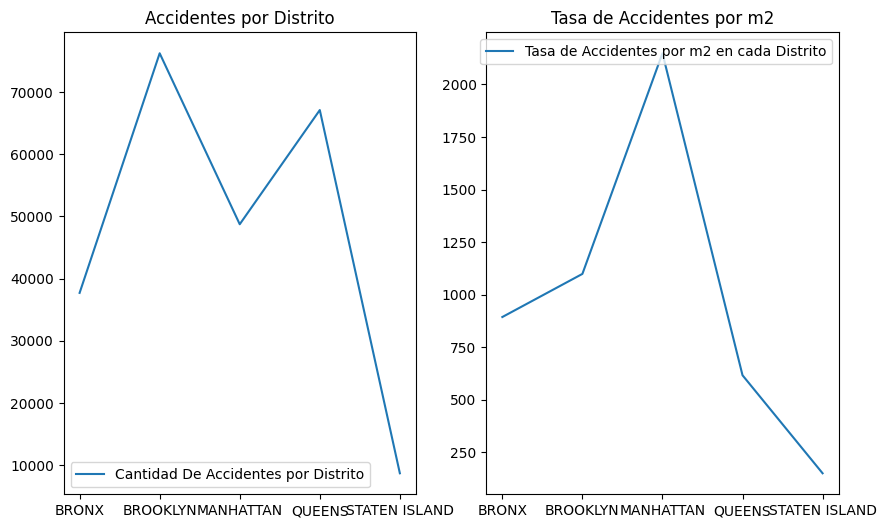

In [34]:
x = list(df_Plot["BOROUGH"])
y1 = list(df_Plot["COLLISION_ID"])
y2 = list(df_Plot["COLLITIONS_RATE"])

# Crear la figura con 2 filas y 2 columnas de subgráficos
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))



# Graficar los datos
axs[0].plot(x, y1, label='Cantidad De Accidentes por Distrito')
axs[0].set_title("Accidentes por Distrito")
# axs[0, 0].grid(visible=True, linestyle="--", linewidth=0.7, alpha=0.7)
axs[0].legend()

# Graficar los datos
axs[1].plot(x, y2, label='Tasa de Accidentes por m2 en cada Distrito')
axs[1].set_title("Tasa de Accidentes por m2")
# axs[0, 0].grid(visible=True, linestyle="--", linewidth=0.7, alpha=0.7)
axs[1].legend()



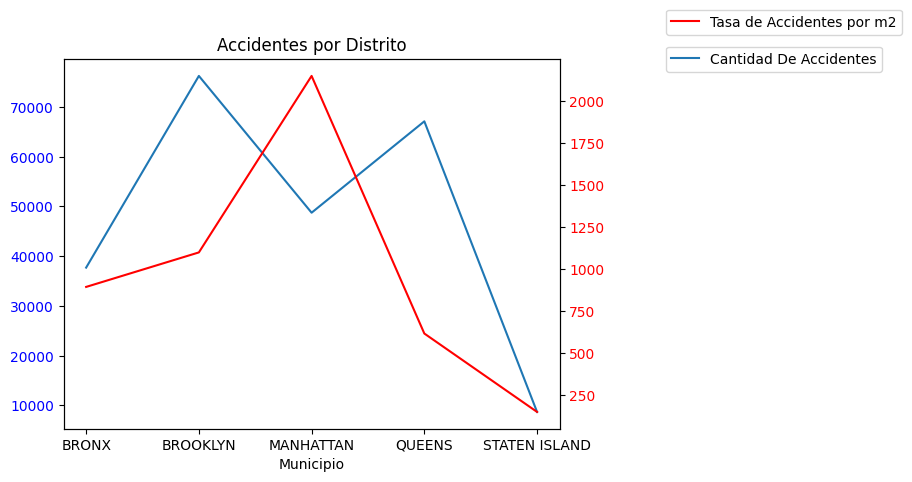

In [35]:
# Datos
Municipios = list(df_Plot["BOROUGH"])
FreqAccidentes = list(df_Plot["COLLISION_ID"])
TasaAccidentes = list(df_Plot["COLLITIONS_RATE"])


# Crear la figura y los ejes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Graficar los datos
ax1.plot(Municipios, FreqAccidentes, label='Cantidad De Accidentes')
ax1.legend(bbox_to_anchor=(1.2, 1), loc='center left')

ax2.plot(Municipios, TasaAccidentes, label='Tasa de Accidentes por m2' , color = "red")
ax2.legend(bbox_to_anchor=(1.2, 1.1), loc='center left')

ax1.set_title("Accidentes por Distrito")


# Personalizar el gráfico

ax1.set_xlabel('Municipio')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Mostrar el gráfico
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

Por mi2 Son los que Menos Accidentes tienen.


### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

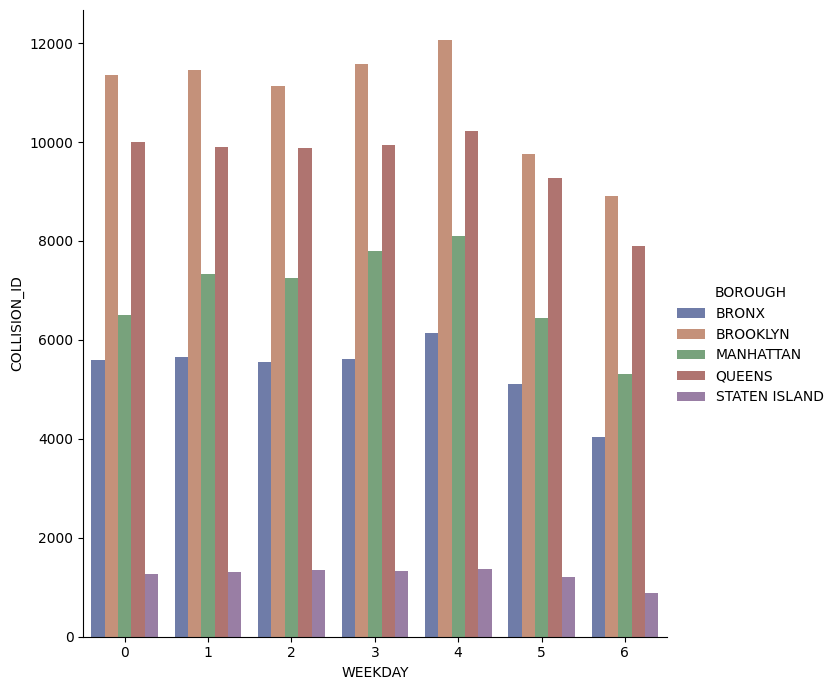

In [36]:
# Solución propuesta
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["WEEKDAY"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.weekday
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby(["BOROUGH","WEEKDAY"]).count()["COLLISION_ID"]
df_InfpPlot=df_InfpPlot.reset_index()
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.
sns.catplot(data=df_InfpPlot, kind="bar", x="WEEKDAY", y="COLLISION_ID", hue="BOROUGH" , palette="dark", alpha=.6, height=7)


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos?

| Municipio  | DiaMayorAccidentalidad |
| ------------- | ------------- |
|Bronx| 4 = Viernes|
|Brooklyn| 4 = Viernes|
|Manhattan| 4 = viernes|
|Queens| 4 = viernes|
|Satetn Island| 2 = Miercoles y 4 = Viernes|

¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Generalmente pareciera Ser que los dias de Mayor accidentalidad son los Mismos en todos los Municipios.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

In [37]:
df_unpivot = pd.melt(df,
                  id_vars=['COLLISION_ID','BOROUGH'],
                  value_vars=['CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5'],
                  var_name='CONTRIBUTING_FACTOR_VEHICLE',
                  value_name='FACTOR_VEHICLE')

df_unpivot= df_unpivot[df_unpivot["FACTOR_VEHICLE"] != 'Unspecified'].drop_duplicates()
dfTop10  = df_unpivot.groupby("FACTOR_VEHICLE").count()["COLLISION_ID"].sort_values(ascending=False).head(10).reset_index()
dfTop10

,FACTOR_VEHICLE,COLLISION_ID
0,Driver Inattention/Distraction,72203
1,Failure to Yield Right-of-Way,20413
2,Following Too Closely,17909
3,Backing Unsafely,15068
4,Passing Too Closely,13378
5,Passing or Lane Usage Improper,12953
6,Other Vehicular,11093
7,Unsafe Lane Changing,6986
8,Turning Improperly,6798
9,Traffic Control Disregarded,5146


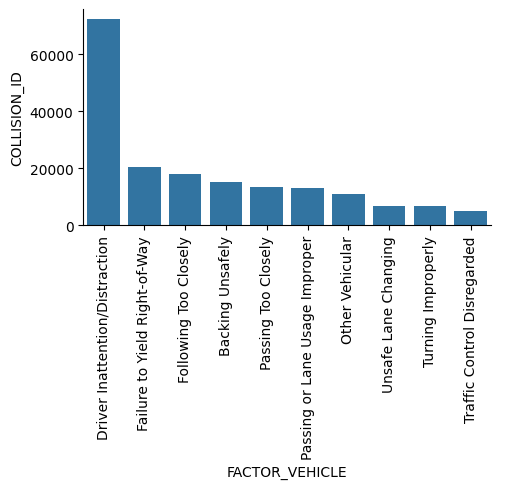

In [38]:
grafic = sns.catplot(data=dfTop10, kind="bar", x="FACTOR_VEHICLE", y="COLLISION_ID")
grafic.set_xticklabels(rotation=90)
# Ajustar el espaciado para que las etiquetas no se corten (opcional)
plt.tight_layout()


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

In [39]:
dfMunicipiosTop5  = df_unpivot.groupby(["BOROUGH","FACTOR_VEHICLE"]).count()["COLLISION_ID"].reset_index()
dfMunicipiosTop5.sort_values(by=["BOROUGH", "COLLISION_ID"], ascending=[True, False], inplace=True)
dfMunicipiosTop5 = dfMunicipiosTop5.groupby("BOROUGH").head(5).reset_index(drop=True)
dfMunicipiosTop5

,BOROUGH,FACTOR_VEHICLE,COLLISION_ID
0,BRONX,Driver Inattention/Distraction,7939
1,BRONX,Other Vehicular,3496
2,BRONX,Following Too Closely,2674
3,BRONX,Backing Unsafely,2534
4,BRONX,Failure to Yield Right-of-Way,2489
5,BROOKLYN,Driver Inattention/Distraction,20519
6,BROOKLYN,Failure to Yield Right-of-Way,6531
7,BROOKLYN,Following Too Closely,5279
8,BROOKLYN,Backing Unsafely,4483
9,BROOKLYN,Passing Too Closely,4393


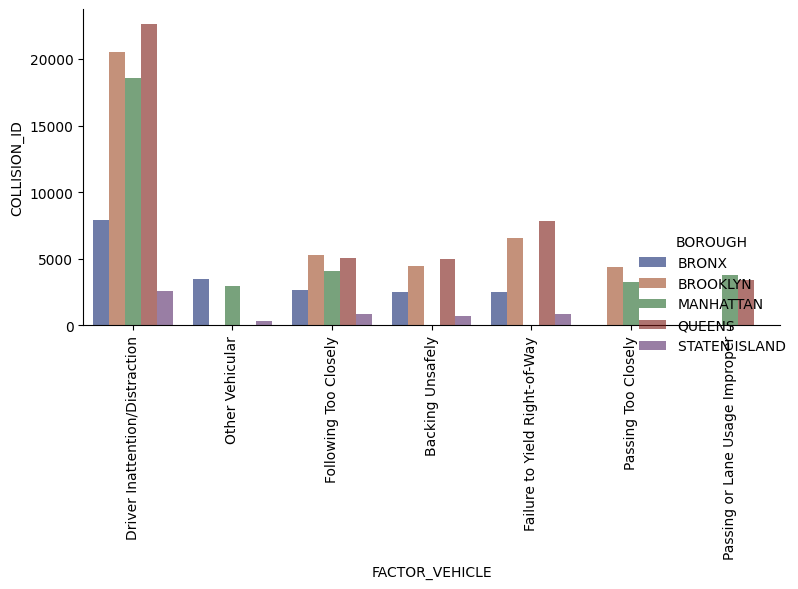

In [40]:
grafic = sns.catplot(data=dfMunicipiosTop5, kind="bar", x="FACTOR_VEHICLE", y="COLLISION_ID", hue="BOROUGH", palette="dark", alpha=.6, height=7)
grafic.figure.set_size_inches(8, 6)
grafic.set_xticklabels(rotation=90)
plt.tight_layout()

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [X] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

>> **Recomendación**:  se evidencia que para los Peatones y Ciclistas qye estuvieron involucrados aumentaron las causas de los accidentes para el primer Trimestre del 2019 vs 2018 dado que en el 2018 se presentaban 6 causan y para el 2019 se presentan 9 siendo la mas predominante [Dalta de Atención delk Conductor/Distracciones] para esto se podria reforzar los Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [120]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = pd.to_datetime(df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00")
df_Mod["QUARTER"] = df_Mod["DATE_TIME"].dt.quarter
df_Mod["YEAR"] = df_Mod["DATE_TIME"].dt.year
df_Mod["NUMBER_OF_AFECCTED_P_C"] = df_Mod["NUMBER_OF_CYCLIST_KILLED"] + df_Mod["NUMBER_OF_PEDESTRIANS_KILLED"] + df_Mod["NUMBER_OF_CYCLIST_INJURED"] + df_Mod["NUMBER_OF_PEDESTRIANS_INJURED"]
df_Mod["NUMBER_OF_KILLED_P_C"] = df_Mod["NUMBER_OF_CYCLIST_KILLED"] + df_Mod["NUMBER_OF_PEDESTRIANS_KILLED"]
df_Mod = df_Mod[df_Mod["QUARTER"] == 1]


df_Mod1 = df_Mod[(df_Mod["QUARTER"] == 1) & (df_Mod["NUMBER_OF_KILLED_P_C"] > 0)]

df_unpivot = pd.melt(df_Mod1,
                  id_vars=['COLLISION_ID',"YEAR",'BOROUGH'],
                  value_vars=['CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5'],
                  var_name='CONTRIBUTING_FACTOR_VEHICLE',
                  value_name='FACTOR_VEHICLE')

df_unpivot= df_unpivot[df_unpivot["FACTOR_VEHICLE"] != 'Unspecified'].drop_duplicates()
df_unpivot.head(5)

,COLLISION_ID,YEAR,BOROUGH,CONTRIBUTING_FACTOR_VEHICLE,FACTOR_VEHICLE
0,4101585,2019,MANHATTAN,CONTRIBUTING_FACTOR_VEHICLE_1,Alcohol Involvement
1,4095140,2019,BRONX,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way
2,4093707,2019,STATEN ISLAND,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way
3,4096754,2019,QUEENS,CONTRIBUTING_FACTOR_VEHICLE_1,Traffic Control Disregarded
6,4080764,2019,BRONX,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way


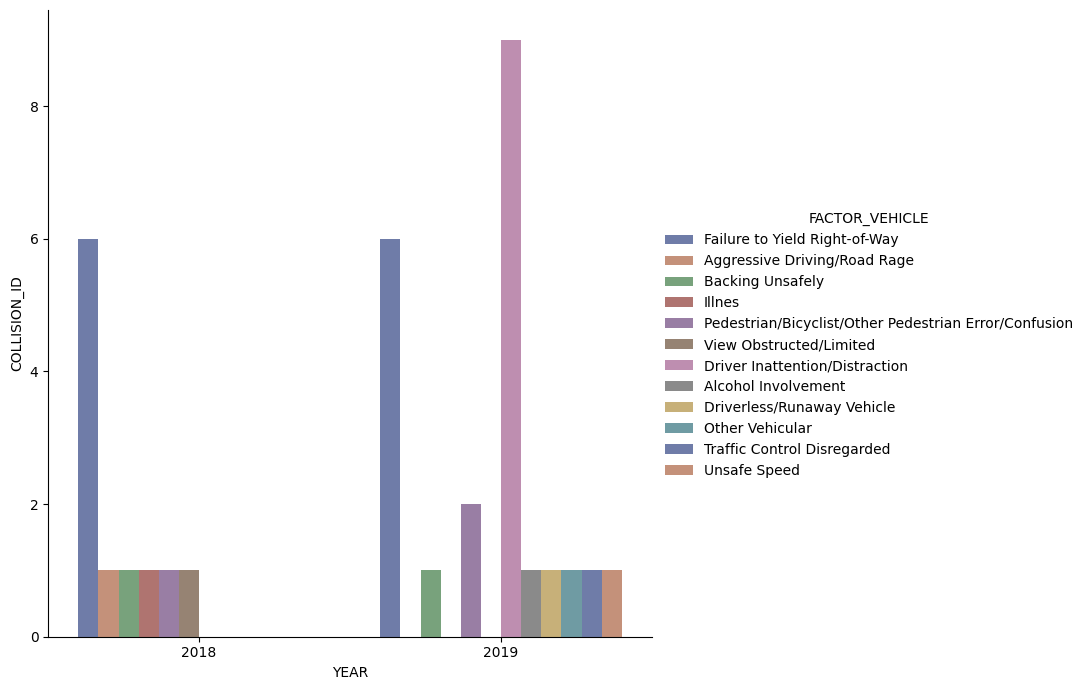

In [94]:

df_groupPlot = df_unpivot.groupby(["YEAR","FACTOR_VEHICLE"])["COLLISION_ID"].count().reset_index().sort_values(["YEAR","COLLISION_ID"], ascending=False).reset_index().drop(columns=["index"])
sns.catplot(data=df_groupPlot, kind="bar", x="YEAR", y="COLLISION_ID", hue="FACTOR_VEHICLE" , palette="dark", alpha=.6, height=7)
# g = sns.FacetGrid(df_groupPlot, col="YEAR" , row="FACTOR_VEHICLE" )
# g.map(sns.histplot, "COLLISION_ID")
# g.add_legend()

In [145]:
df_fil = df_Mod[(df_Mod["ON_STREET_NAME"] != "UNKNOWN") & (df_Mod["NUMBER_OF_AFECCTED_P_C"] > 0)]
df_fil = df_fil[["COLLISION_ID","YEAR","ON_STREET_NAME"]].groupby(["YEAR","ON_STREET_NAME"]).count().sort_values(by="COLLISION_ID", ascending=False).reset_index()
df_fil = df_fil.groupby("YEAR").head(20)
df_fil

,YEAR,ON_STREET_NAME,COLLISION_ID
0,2018,BROADWAY,34
1,2019,BROADWAY,28
2,2018,3 AVENUE,25
3,2019,2 AVENUE,23
4,2018,NORTHERN BOULEVARD,23
5,2019,3 AVENUE,21
6,2019,1 AVENUE,18
7,2019,ATLANTIC AVENUE,18
8,2018,1 AVENUE,18
9,2018,2 AVENUE,17


<Axes: xlabel='ON_STREET_NAME', ylabel='YEAR'>

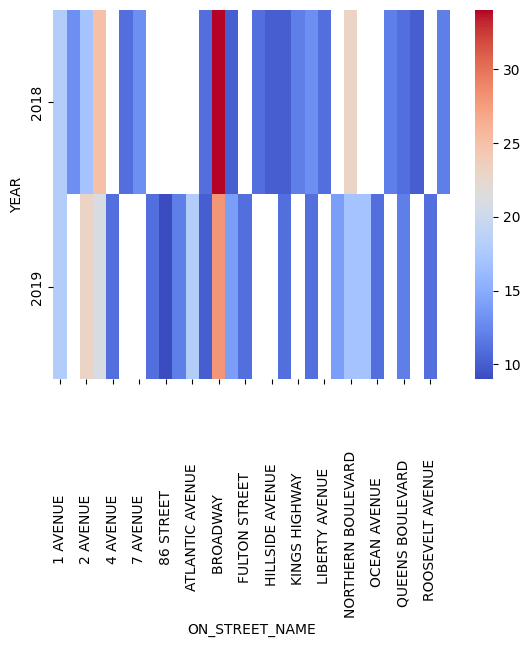

In [153]:
df_fil_pivot = df_fil.pivot(index="YEAR", columns="ON_STREET_NAME", values="COLLISION_ID")
sns.heatmap(df_fil_pivot , cmap='coolwarm')

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

In [ ]:
# Solución propuesta